# **Preprocessing of Single-cell RNA Sequencing data**

In [ ]:
R.version.string

[1] "R version 4.1.2 (2021-11-01)"

Install the Httpuv library. It allows R code to interact with HTTP and WebSocket clients to serve web traffic from an R process.

In [ ]:
install.packages("googledrive") #only need to install occasionally
install.packages("httpuv")
library("googledrive")
library("httpuv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) { #may need to update python version occasionally
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/auth?client_id=603366585132-dpeg5tt0et3go5of2374d83ifevk5086.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code



Enter authorization code: 4/1AX4XfWiuqj-EshVQaO11FjNl6tr-VcvdhaBWheDPYj4yjJeW25w8pJtOC1s


In [ ]:
getwd()

[1] "/content"

--------------------------------------------------------------------------------

# **I will be analyzing one of Macosko batches.**

I use the count matrix to create a Seurat object. The object serves as a container that contains both data (like the count matrix) and analysis (like PCA, or clustering results) for a single-cell dataset. 

In [ ]:
install.packages('Seurat')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘sass’, ‘BH’, ‘sitmo’, ‘globals’, ‘listenv’, ‘parallelly’, ‘plyr’, ‘zoo’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘RcppTOML’, ‘here’, ‘gplots’, ‘reshape2’, ‘gridExtra’, ‘RcppArmadillo’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘bslib’, ‘spatstat.data’, ‘spatstat.random’, ‘spatstat.utils’, ‘spatstat.sparse’, ‘abind’, ‘tensor’, ‘goftest’, ‘deldir’, ‘polyclip’, ‘FNN’, ‘RSpectra’, ‘dqrng’, ‘cowplot’, ‘fitdistrplus’, ‘future’, ‘future.apply’, ‘ggrepel’, ‘ggridges’, ‘ica’, ‘igraph’, ‘irlba’, ‘leiden’, ‘lmtest’, ‘matrixStats’, ‘miniUI’, ‘patchwork’, ‘pbapply’, ‘plotly’, ‘png’, ‘RANN’, ‘RcppAnnoy’, ‘reticulate’, ‘ROCR’, ‘Rtsne’, ‘scattermore’, ‘sctransform’, ‘SeuratObject’, ‘shiny’, ‘spatstat.core’, ‘spatstat.geom’, ‘uwot’, ‘RcppEigen’, ‘RcppProgress’




Libraries to run Seurat functions

In [ ]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject



Load dataset

In [ ]:
x <- drive_get("~/Colab Notebooks/Single Cell Data Analysis/dataset/macosko/r1BatchSingleCellMacosko_T.csv")
drive_download(x)
count.data <- read.csv("/content/r1BatchSingleCellMacosko_T.csv")
head(count.data)





→ Files retrieved so far: 100

→ Files retrieved so far: 200

→ Files retrieved so far: 300

→ Files retrieved so far: 400

→ Files retrieved so far: 500

→ Files retrieved so far: 600

→ Files retrieved so far: 700

→ Files retrieved so far: 800

→ Files retrieved so far: 900

→ Files retrieved so far: 1000

→ Files retrieved so far: 1100

→ Files retrieved so far: 1200

→ Files retrieved so far: 1300

→ Files retrieved so far: 1400

✔ The input `path` resolved to exactly 1 file.

File downloaded:

• r1BatchSingleCellMacosko_T.csv <id: 1iOU9sDHsG8Xke683kLOf_IOJN5k18hwc>

Saved locally as:

• r1BatchSingleCellMacosko_T.csv



,cellNames,r1_AAAAACGTCTAC,r1_AAAAATCGACAT,r1_AAAACATAATTG,r1_AAAACCGACGAA,r1_AAAACTTACGAC,r1_AAAACTTATTCC,r1_AAAAGAGAGGAC,r1_AAAAGCTTACAA,r1_AAAAGGTCTTTA,⋯,r1_TTTTGCTGGGAA,r1_TTTTGGCCTTAG,r1_TTTTTAAACCTA,r1_TTTTTAAAGTTG,r1_TTTTTCAGAGCT,r1_TTTTTCTTTTTA,r1_TTTTTGGGGTCC,r1_TTTTTTCGCGAC,r1_TTTTTTGGGTCC,r1_TTTTTTGTGCTT
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,KITL,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,TMTC3,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,CEP290,0,0,0,1,0,2,0,0,0,⋯,0,0,0,1,0,0,0,0,0,1
4,X4930430F08RIK,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0
5,X1700017N19RIK,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,MGAT4C,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Initialize the Seurat object with the raw (non-normalized data).

In [ ]:
ScObject <- CreateSeuratObject(counts = count.data, project = "Sinle-Cell", min.cells = 3, min.features = 200)
ScObject

Warning message in storage.mode(from) <- "double":
“NAs introduced by coercion”


An object of class Seurat 
16558 features across 6020 samples within 1 assay 
Active assay: RNA (16558 features, 0 variable features)

**Standard pre-processing workflow**

The steps below encompass the standard pre-processing workflow for scRNA-seq data in Seurat. These represent the selection and filtration of cells based on **QC metrics**, **data normalization** and **scaling**, and the **detection of highly variable features**.


**1. QC and selecting cells for further analysis**

Seurat allows you to easily explore QC metrics and filter cells based on any user-defined criteria. A few QC metrics commonly used by the community include

    The number of unique genes detected in each cell.
        - Low-quality cells or empty droplets will often have very few genes
        - Cell doublets or multiplets may exhibit an aberrantly high gene count
    Similarly, the total number of molecules detected within a cell (correlates strongly with unique genes)
    The percentage of reads that map to the mitochondrial genome
        - Low-quality / dying cells often exhibit extensive mitochondrial contamination
        - We calculate mitochondrial QC metrics with the PercentageFeatureSet() function, which calculates the percentage of counts originating from a set of features
        - We use the set of all genes starting with MT- as a set of mitochondrial genes



In [ ]:
# The [[ operator can add columns to object metadata. This is a great place to stash QC stats
ScObject[["percent.mt"]] <- PercentageFeatureSet(ScObject, pattern = "^MT-")

visualize QC metrics, and use these to filter cells.

    I filter cells that have unique feature counts over 2,500 or less than 200
    I filter cells that have >5% mitochondrial counts


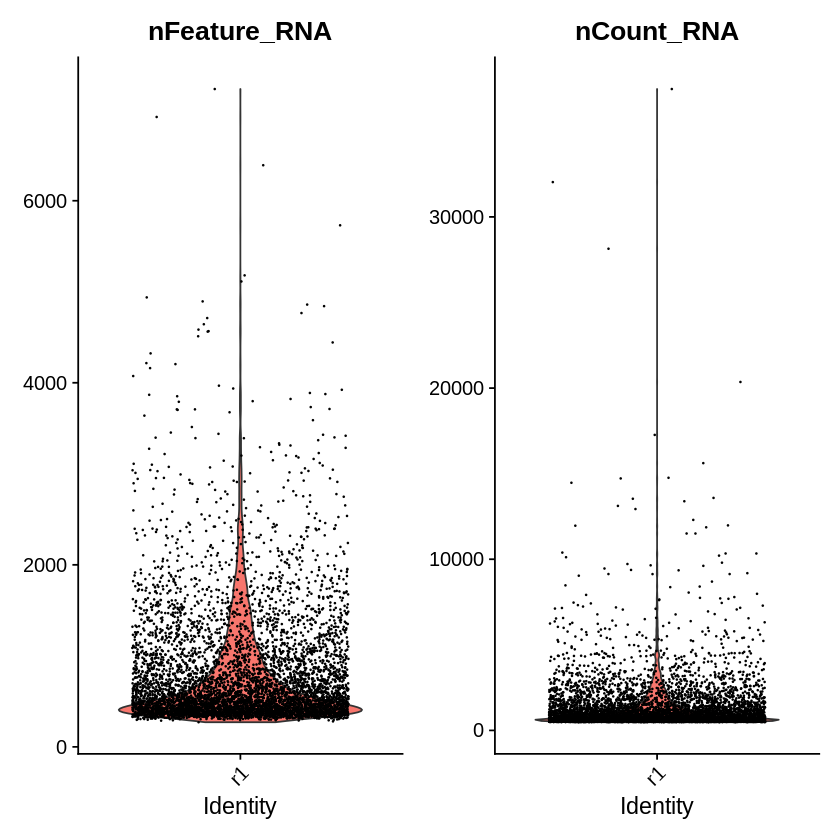

In [ ]:
# Visualize QC metrics as a violin plot
VlnPlot(ScObject, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2)

Description: 

The "nFeature_RNA" plot (the first one) shows the number of detected genes for every cell.

The red shape shows the distribution of the data. For the "nFeature_RNA" plot, you can see that the average number of genes per cell is about 500 and most of the cells have roughly around 400-700 genes.

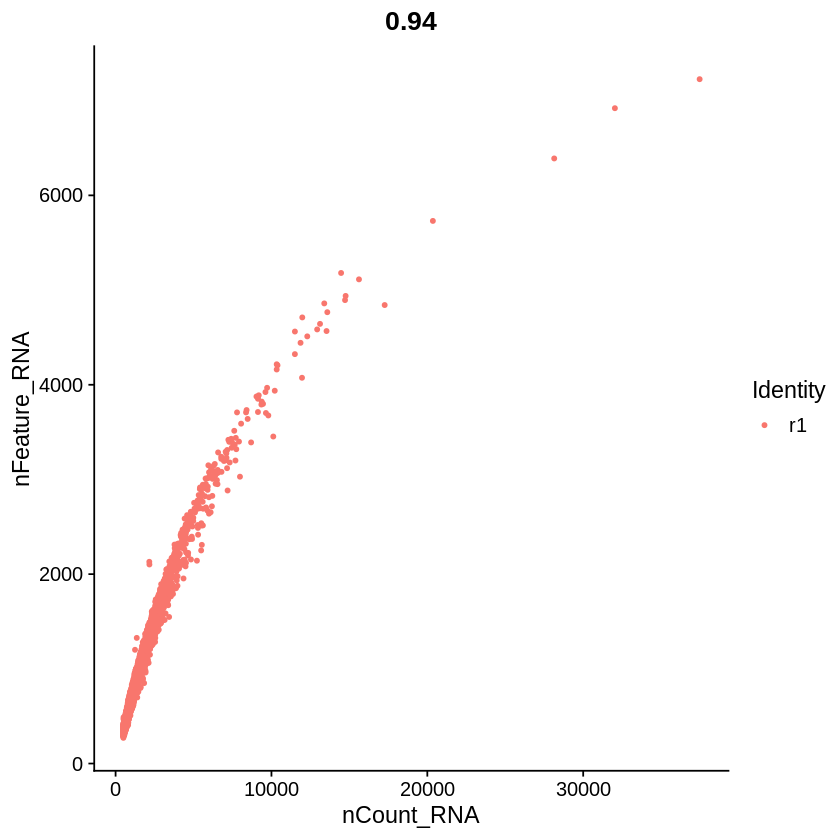

In [ ]:
# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.

FeatureScatter(ScObject, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

Description:

**nFeature_RNA** is the number of genes detected in each cell. **nCount_RNA** is the total number of molecules detected within a cell. Low nFeature_RNA for a cell indicates that it may be dead/dying or an empty droplet. High nCount_RNA and/or nFeature_RNA indicates that the "cell" may in fact be a doublet (or multiplet). In combination with %mitochondrial reads, removing outliers from these groups removes most doublets/dead cells/empty droplets, hence why filtering is a common pre-processing step.

In [ ]:
ScObject <- subset(ScObject, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)

**2. Normalizing the data**

After removing unwanted cells from the dataset, the next step is to normalize the data. By default, we employ a global-scaling normalization method “LogNormalize” that normalizes the feature expression measurements for each cell by the total expression, multiplies this by a scale factor (10,000 by default), and log-transforms the result. Normalized values are stored in ScObject[["RNA"]]@data

In [ ]:
ScObject <- NormalizeData(ScObject, normalization.method = "LogNormalize", scale.factor = 10000)

**3. Identification of highly variable features (feature selection)**

I next calculate a subset of features that exhibit high cell-to-cell variation in the dataset (i.e, they are highly expressed in some cells, and lowly expressed in others). They are found by focusing on these genes in downstream analysis helps to highlight biological signal in single-cell datasets.

By default, we return 2,000 features per dataset. These will be used in downstream analysis, like PCA.

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 5 rows containing missing values (geom_point).”


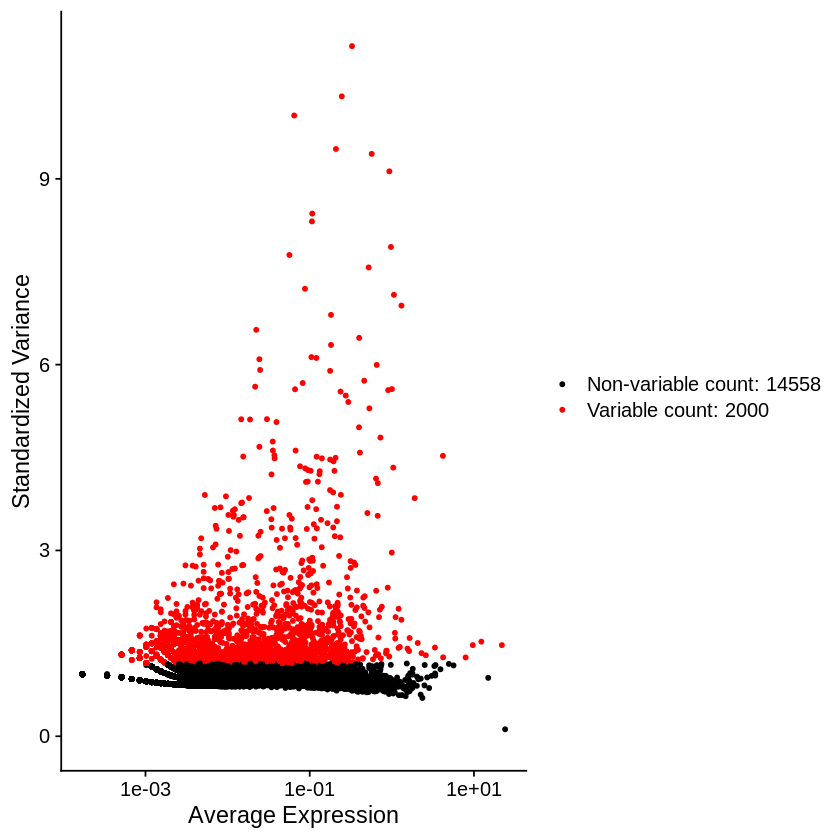

In [ ]:
ScObject <- FindVariableFeatures(ScObject, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(ScObject), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(ScObject)
VariableFeaturePlot(ScObject)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 5 rows containing missing values (geom_point).”


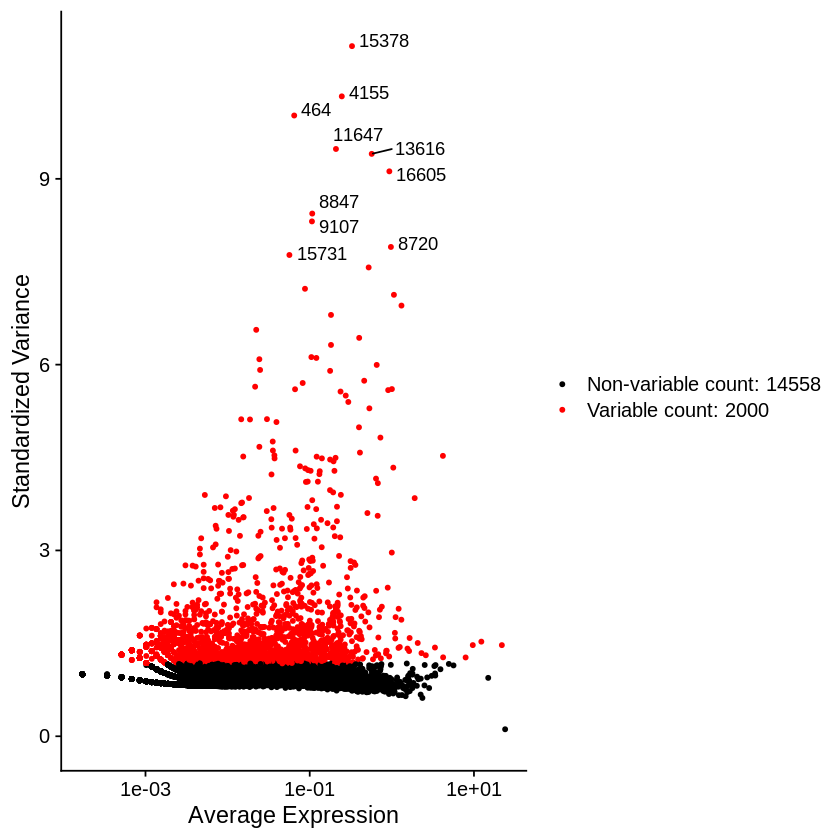

In [ ]:
LabelPoints(plot = plot1, points = top10, repel = TRUE)


**4. Scaling the data**

Next, I apply a linear transformation (‘scaling’) that is a standard pre-processing step prior to dimensional reduction techniques like PCA. The ScaleData() function:

    Shifts the expression of each gene, so that the mean expression across cells is 0.
    Scales the expression of each gene, so that the variance across cells is 1.
        - This step gives equal weight in downstream analyses, so that highly-expressed genes do not dominate.
    The results of this are stored in ScObject[["RNA"]]@scale.data.


In [ ]:
all.genes <- rownames(ScObject)
ScObject <- ScaleData(ScObject, features = all.genes)

Centering and scaling data matrix

